# 1. DATA CLEANING

### 1.1 INTRODUCTION 

This notebook is for twitter sentiment analysis which goes through a neccessary steps for any data science project

### 1.2 PROBLEM STATEMENT

This section is for the project at-hand

### 1.3 GETTING DATA

Our Data for this project is found on the local disk or computer

In [1]:
#Importing libraries Getting the Data
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize

In [2]:
train = pd.read_csv(r'C:\Users\User\Desktop\Data Analysis\Data\NLP\Corona_NLP_train.csv', encoding='latin1')
test = pd.read_csv(r'C:\Users\User\Desktop\Data Analysis\Data\NLP\Corona_NLP_test.csv', encoding='latin1')

Data = pd.concat([train,test])

In [3]:
Data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16/03/2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16/03/2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16/03/2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16/03/2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [4]:
#Converting Tweets to strings

train['Text'] = train.OriginalTweet
train['Text'] = train['Text'].astype(str)

test['Text'] = test.OriginalTweet
test['Text'] = test['Text'].astype(str)

### 1.4 DATA CLEANING

In [5]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
train['Text']=train['Text'].apply(lambda x:remove_urls(x))
test['Text']=test['Text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
train['Text']=train['Text'].apply(lambda x:remove_html(x))
test['Text']=test['Text'].apply(lambda x:remove_html(x))

In [6]:
#Lowercase Characters
def lower(text):
    low_text = text.lower()
    return low_text
train['Text'] = train['Text'].apply(lambda x: lower(x))
test['Text'] = test['Text'].apply(lambda x: lower(x))

In [7]:
#Remove numbers
def remove_number(text):
    number_remove = re.sub(r'\d+\r', '',text)
    return number_remove
train['Text'] = train['Text'].apply(lambda x: remove_number(x))
test['Text'] = test['Text'].apply(lambda x: remove_number(x))

In [8]:
#Removing stopswords and punctuations
def remove_punct(text):
    punct_remove = re.sub(r'[^\w\s\d]','',text)
    return punct_remove
train['Text'] = train['Text'].apply(lambda x: remove_punct(x))
test['Text'] = test['Text'].apply(lambda x: remove_punct(x))

In [9]:
#Remove mentions and hashtags
def remove_mentions(text):
    mentions = re.sub(r'@\w+','',text)
    return mentions
train['Text'] = train['Text'].apply(lambda x: remove_mentions(x))
test['Text'] = test['Text'].apply(lambda x: remove_mentions(x))

In [10]:
#Remove hashtags
def remove_hashtags(text):
    hashtags = re.sub(r'#\w+','',text)
    return hashtags
train['Text'] = train['Text'].apply(lambda x: remove_hashtags(x))
test['Text'] = test['Text'].apply(lambda x: remove_hashtags(x))

In [11]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
train['Text'] = train['Text'].apply(lambda x: remove_space(x))
test['Text'] = test['Text'].apply(lambda x: remove_space(x))

In [12]:
#Removing Covid related words
stopwords = ['COVID_19','covid19','outbreak','fightcovid19','coronavirusupdate','covid19ghana','coronavirus','COVID2019','Coronavirus','COVID19','COVID19','COVID19','Coronavirus','Corona','Crisis','CoronaVirus','coronavirusnigeria','covid19\w+']

def remove_covid(text):
    for character in stopwords:
        text = text.replace(character,'')
    return text
train['Text'] = train['Text'].apply(lambda x: remove_covid(x))
test['Text'] = test['Text'].apply(lambda x: remove_covid(x))

In [13]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv and and
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,australia woolworths to give elderly disabled...
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the not...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14/04/2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...
41153,44952,89904,NaN,14/04/2020,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing rel...
41154,44953,89905,NaN,14/04/2020,You know itÂs getting tough when @KameronWild...,Positive,you know itâs getting tough when kameronwilds ...
41155,44954,89906,NaN,14/04/2020,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...


### 1.5 ORGANIZING DATA

We organize the data in two forms 
thus 
1. Corpus - Collection of text
2. Document-Term Matrix = word count in matrix form

### 1.5.1 Corpus

In [14]:
train_df = train
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv and and
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,australia woolworths to give elderly disabled...
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the not...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14/04/2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...
41153,44952,89904,NaN,14/04/2020,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing rel...
41154,44953,89905,NaN,14/04/2020,You know itÂs getting tough when @KameronWild...,Positive,you know itâs getting tough when kameronwilds ...
41155,44954,89906,NaN,14/04/2020,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...


In [15]:
train_df.to_pickle('corpus.pkl')

### 1.6 Most Common Words

In [16]:
#Top 30 words
from collections import Counter

In [17]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv and and
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,australia woolworths to give elderly disabled...
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the not...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14/04/2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...
41153,44952,89904,NaN,14/04/2020,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing rel...
41154,44953,89905,NaN,14/04/2020,You know itÂs getting tough when @KameronWild...,Positive,you know itâs getting tough when kameronwilds ...
41155,44954,89906,NaN,14/04/2020,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...


In [18]:
train_df['Text']

0                     menyrbie phil_gahan chrisitv and and
1        advice talk to your neighbours family to excha...
2         australia woolworths to give elderly disabled...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the   not...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing  rel...
41154    you know itâs getting tough when kameronwilds ...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: Text, Length: 41157, dtype: object

In [20]:
train['Sentiment']

0                   Neutral
1                  Positive
2                  Positive
3                  Positive
4        Extremely Negative
                ...        
41152               Neutral
41153    Extremely Negative
41154              Positive
41155               Neutral
41156              Negative
Name: Sentiment, Length: 41157, dtype: object

## Exploratory Analysis

In [25]:
#importing Seabon
import seaborn as sns
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Sentiment Distribution')

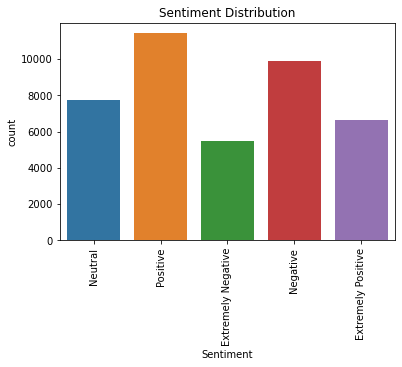

In [26]:
sns.countplot(x= 'Sentiment',data = train)
plt.xticks(rotation = '90')
plt.title('Sentiment Distribution')

In [27]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv and and
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,australia woolworths to give elderly disabled...
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the not...


##### Location

In [31]:
train.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [40]:
train.Location.value_counts()

London                        540
United States                 528
London, England               520
New York, NY                  395
Washington, DC                373
                             ... 
American Fork, Utah             1
Frankfurt, Hesse                1
Windsor, UK.                    1
Whitehouse Bar & Pool Room      1
Hermosa Beach                   1
Name: Location, Length: 12220, dtype: int64

In [80]:
train[train['Location']=='Ghana']['OriginalTweet'].iloc[24]

"Come to think of it these high prices of  sanitiser's what woulf it use after the covid-19"

In [72]:
train.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

In [37]:
train.Location.isnull().sum()

8590